In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import networkx as nx

from opt_utils import *
from linalg_utils import remove_small_eigenvalues

In [2]:
import os
folder = os.path.abspath(os.getcwd())

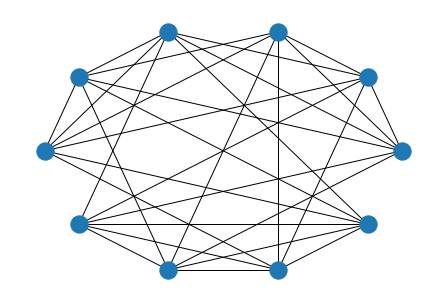

In [3]:
graph_file = "johnson8-2-4.mtx"
graph_type = 1

n = 10
G = nx.complement(load_graph(graph_file, graph_type, n))
nx.draw(G, nx.circular_layout(G))


## Lovasz

In [98]:
prob_lovasz, Z = lovasz_sdp(G)

2.500000002182305


In [99]:
np.linalg.eigvalsh(Z.value)

array([-7.69534349e-11, -7.69534008e-11, -7.69533901e-11, -7.69533458e-11,
        1.50000000e-01,  1.50000000e-01,  1.50000000e-01,  1.50000000e-01,
        1.50000000e-01,  2.50000000e-01])

In [100]:
Z_val = remove_small_eigenvalues(Z.value)

In [101]:
Z_center = 1 / n * np.eye(n)

### Fixed point iteration

In [102]:
Z_path = fixed_point_iteration(prob_lovasz, Z, -Z_center, returns_path=True, verbose=True)

initial objective: 2.500000
initial eigenvalues:
[-7.69534349e-11 -7.69534008e-11 -7.69533901e-11 -7.69533458e-11
  1.50000000e-01  1.50000000e-01  1.50000000e-01  1.50000000e-01
  1.50000000e-01  2.50000000e-01]
fixed point objective: 2.500000
fixed point eigenvalues:
[4.40744363e-11 4.40744875e-11 4.40745014e-11 4.40745144e-11
 1.50000000e-01 1.50000000e-01 1.50000000e-01 1.50000000e-01
 1.50000000e-01 2.50000000e-01]
iterations:  1


In [103]:
Z_fixed_point = Z.value
Z.value = Z_val

In [104]:
Z_fixed_point

array([[1.00000000e-01, 5.21320459e-12, 5.21320462e-12, 5.21320466e-12,
        5.21320466e-12, 5.00000000e-02, 5.21320464e-12, 5.21320459e-12,
        5.00000000e-02, 5.00000000e-02],
       [5.21320459e-12, 1.00000000e-01, 5.21320463e-12, 5.21320463e-12,
        5.00000000e-02, 5.21320462e-12, 5.21320465e-12, 5.00000000e-02,
        5.21320460e-12, 5.00000000e-02],
       [5.21320462e-12, 5.21320463e-12, 1.00000000e-01, 5.00000000e-02,
        5.21320456e-12, 5.21320459e-12, 5.00000000e-02, 5.21320464e-12,
        5.21320465e-12, 5.00000000e-02],
       [5.21320466e-12, 5.21320463e-12, 5.00000000e-02, 1.00000000e-01,
        5.21320469e-12, 5.21320465e-12, 5.21320455e-12, 5.00000000e-02,
        5.00000000e-02, 5.21320456e-12],
       [5.21320466e-12, 5.00000000e-02, 5.21320456e-12, 5.21320469e-12,
        1.00000000e-01, 5.21320455e-12, 5.00000000e-02, 5.21320469e-12,
        5.00000000e-02, 5.21320471e-12],
       [5.00000000e-02, 5.21320462e-12, 5.21320459e-12, 5.21320465e-12,
   

In [105]:
try:
    Z_vec = recover_incidence_vector(Z_fixed_point, "lovasz")
    nx.draw(G, nx.circular_layout(G), node_color=Z_vec)
except:
    print("recovery failed")

recovery failed


## Grotschel

In [4]:
prob_grotschel, X, x, X_plus = grotschel_sdp(G)

2.5000000032775485


In [5]:
X_val = remove_small_eigenvalues(X.value)
x_val = x.value

In [108]:
prob_center_grotschel = cp.Problem(cp.Maximize(cp.log_det(X_plus)), prob_grotschel.constraints)

prob_center_grotschel.solve()

# X_center = X.value
X_center = X_plus.value

X.value = X_val
x.value = x_val

### Fixed point iteration

In [13]:
# X_path = fixed_point_iteration(prob_grotschel, X, -X_center, returns_path=True, verbose=True)
X_path = fixed_point_iteration(prob_grotschel, X_plus, -X_center, returns_path=True)
# X_path = fixed_point_iteration(prob_grotschel, X_plus, -1/2, returns_path=True)

initial objective: 2.500000
initial eigenvalues:
[-1.74206538e-10 -9.06362198e-17 -6.70274058e-18  6.01170284e-17
  6.72241019e-17  3.75000000e-01  3.75000000e-01  3.75000000e-01
  3.75000000e-01  3.75000000e-01  1.62500000e+00]
current objective: 0.000000
fixed point objective: 0.000000
fixed point eigenvalues:
[-1.81829159e-10  4.33989396e-11  4.33989396e-11  4.33989396e-11
  4.33989396e-11  4.33989396e-11  2.44538441e-10  2.44538441e-10
  2.44538441e-10  2.44538441e-10  1.00000000e+00]
iterations:  2


In [14]:
X_fixed_point = X.value
X_plus_fixed_point = X_plus.value
X.value = X_val
x.value = x_val

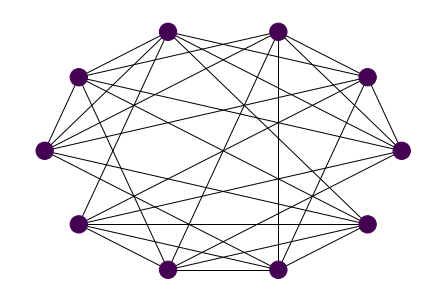

In [15]:
try:
    X_vec = recover_incidence_vector(X_fixed_point, "grotschel")
    nx.draw(G, nx.circular_layout(G), node_color=X_vec)
except:
    print("recovery failed")

## Benson & Ye

In [72]:
prob_benson, V = benson_sdp(G)

2.499999998269009


In [73]:
V_val = remove_small_eigenvalues(V.value)

In [74]:
prob_center_benson = cp.Problem(cp.Maximize(cp.log_det(V)), prob_benson.constraints)

prob_center_benson.solve()

V_center = V.value
V.value = V_val

### Fixed point iteration

In [75]:
V_path = fixed_point_iteration(prob_benson, V, -V_center, returns_path=True, verbose=True)

initial objective: 2.500000
initial eigenvalues:
[-5.24286909e-16 -1.79519141e-16 -8.94452969e-17  1.49297227e-16
  3.24824456e-16  1.50000000e+00  1.50000000e+00  1.50000000e+00
  1.50000000e+00  1.50000000e+00  3.50000000e+00]
fixed point objective: 2.500000
fixed point eigenvalues:
[-3.93274426e-09  2.36335492e-09  2.36340102e-09  2.36341276e-09
  2.36342915e-09  1.49999064e+00  1.49999252e+00  1.50000153e+00
  1.50000427e+00  1.50001103e+00  3.49999995e+00]
iterations:  1


In [76]:
V_fixed_point = V.value
V.value = V_val

In [77]:
np.diag(V_fixed_point)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [78]:
try:
    V_vec = recover_incidence_vector(V_fixed_point, "benson")
    nx.draw(G, nx.circular_layout(G), node_color=V_vec)
except:
    print("recovery failed")

recovery failed


# SDP sampling

In [79]:
Z_samples = sdp_sampling(prob_lovasz, Z, "lovasz", folder, graph_file, 0)

In [9]:
X_samples = sdp_sampling(prob_grotschel, X, "grotschel", folder, graph_file, 0)

In [81]:
V_samples = sdp_sampling(prob_benson, V, "benson", folder, graph_file, 0)

In [10]:
row = 0
col = 1

### Lovasz

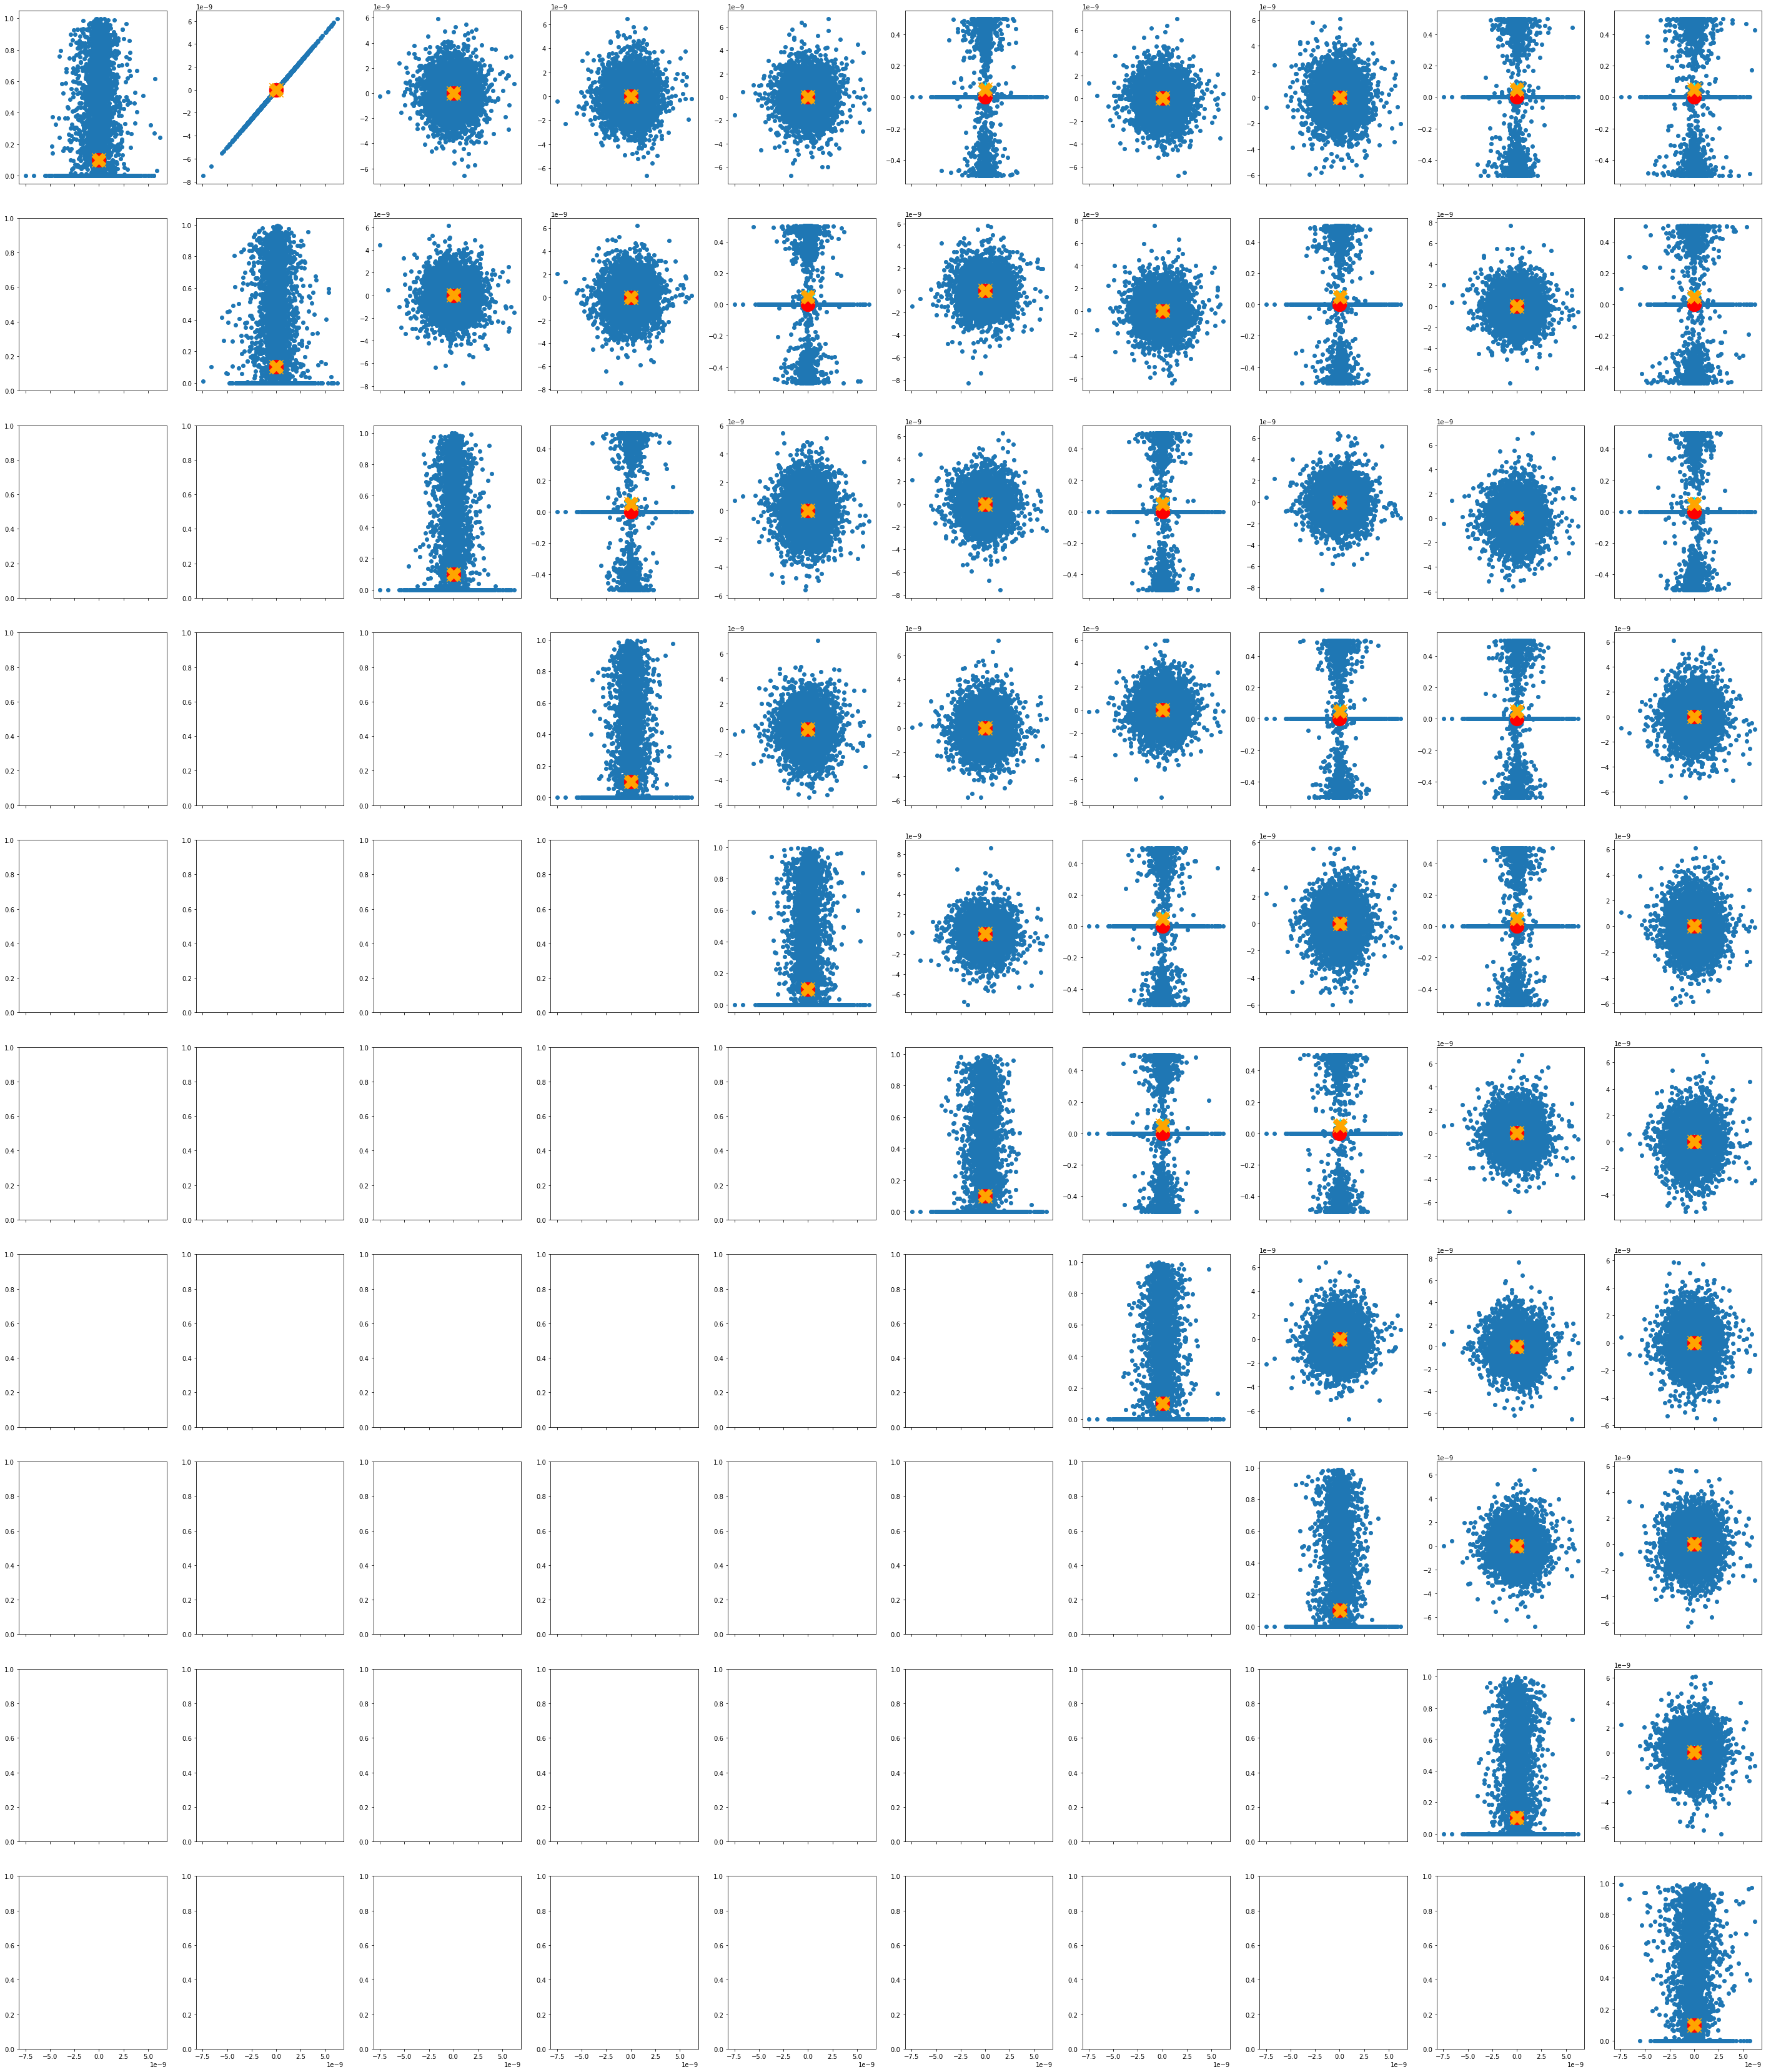

In [83]:
fig, axs = plt.subplots(n, n, figsize=(50, 60), sharex=True)

for i in range(n):
    for j in range(i, n):
        axs[i, j].scatter(Z_samples[:, row, col], Z_samples[:, i, j])
        axs[i, j].scatter(Z_val[row, col], Z_val[i, j], c="aqua", s=5e2, marker="*")
        axs[i, j].scatter(Z_center[row, col], Z_center[i, j], c="red", s=5e2, marker="o")
        axs[i, j].scatter(Z_fixed_point[row, col], Z_fixed_point[i, j], c="orange", s=5e2, marker="X")
        axs[i, j].scatter(Z_path[:, row, col], Z_path[:, i, j], c="orange", s=5e2, marker="x")

### Grotschel

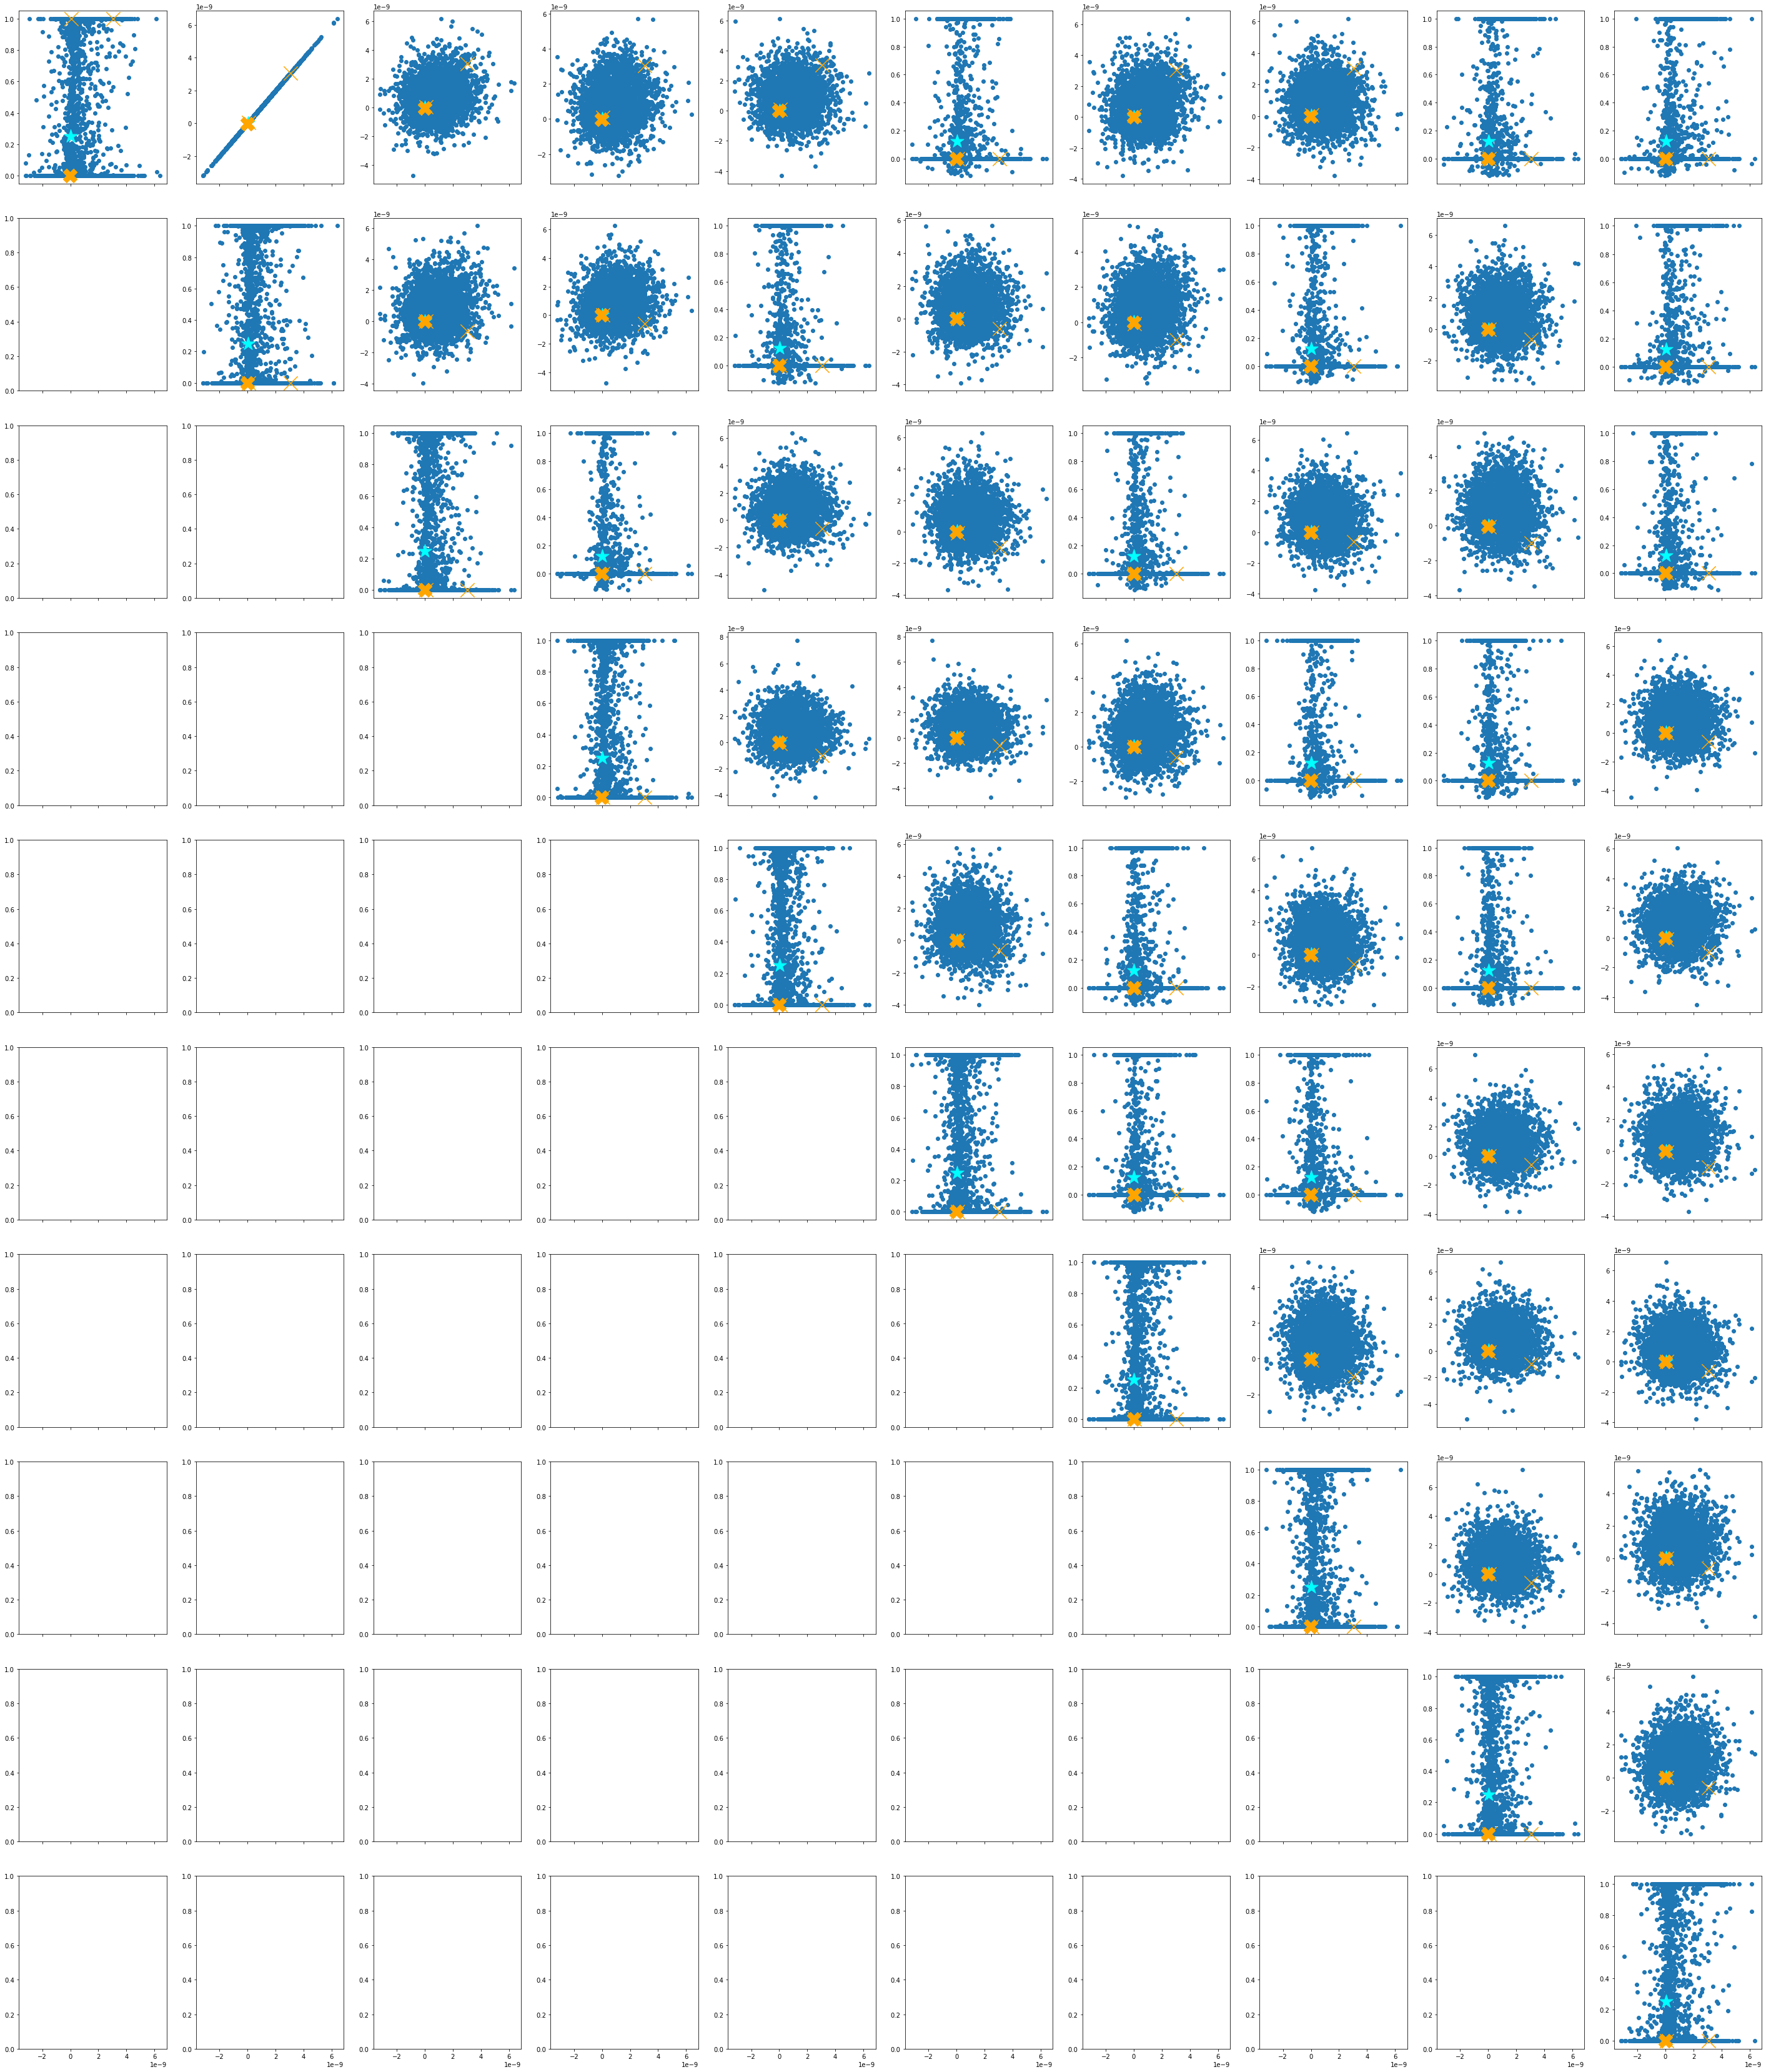

In [17]:
fig, axs = plt.subplots(n, n, figsize=(50, 60), sharex=True)

for i in range(n):
    for j in range(i, n):
        axs[i, j].scatter(X_samples[:, row, col], X_samples[:, i, j])
        axs[i, j].scatter(X_val[row, col], X_val[i, j], c="aqua", s=5e2, marker="*")
        # axs[i, j].scatter(X_center[row, col], X_center[i, j], c="red", s=5e2, marker="o")
        axs[i, j].scatter(X_fixed_point[row, col], X_fixed_point[i, j], c="orange", s=5e2, marker="X")
        axs[i, j].scatter(X_path[:, row, col], X_path[:, i, j], c="orange", s=5e2, marker="x")

### Benson & Ye

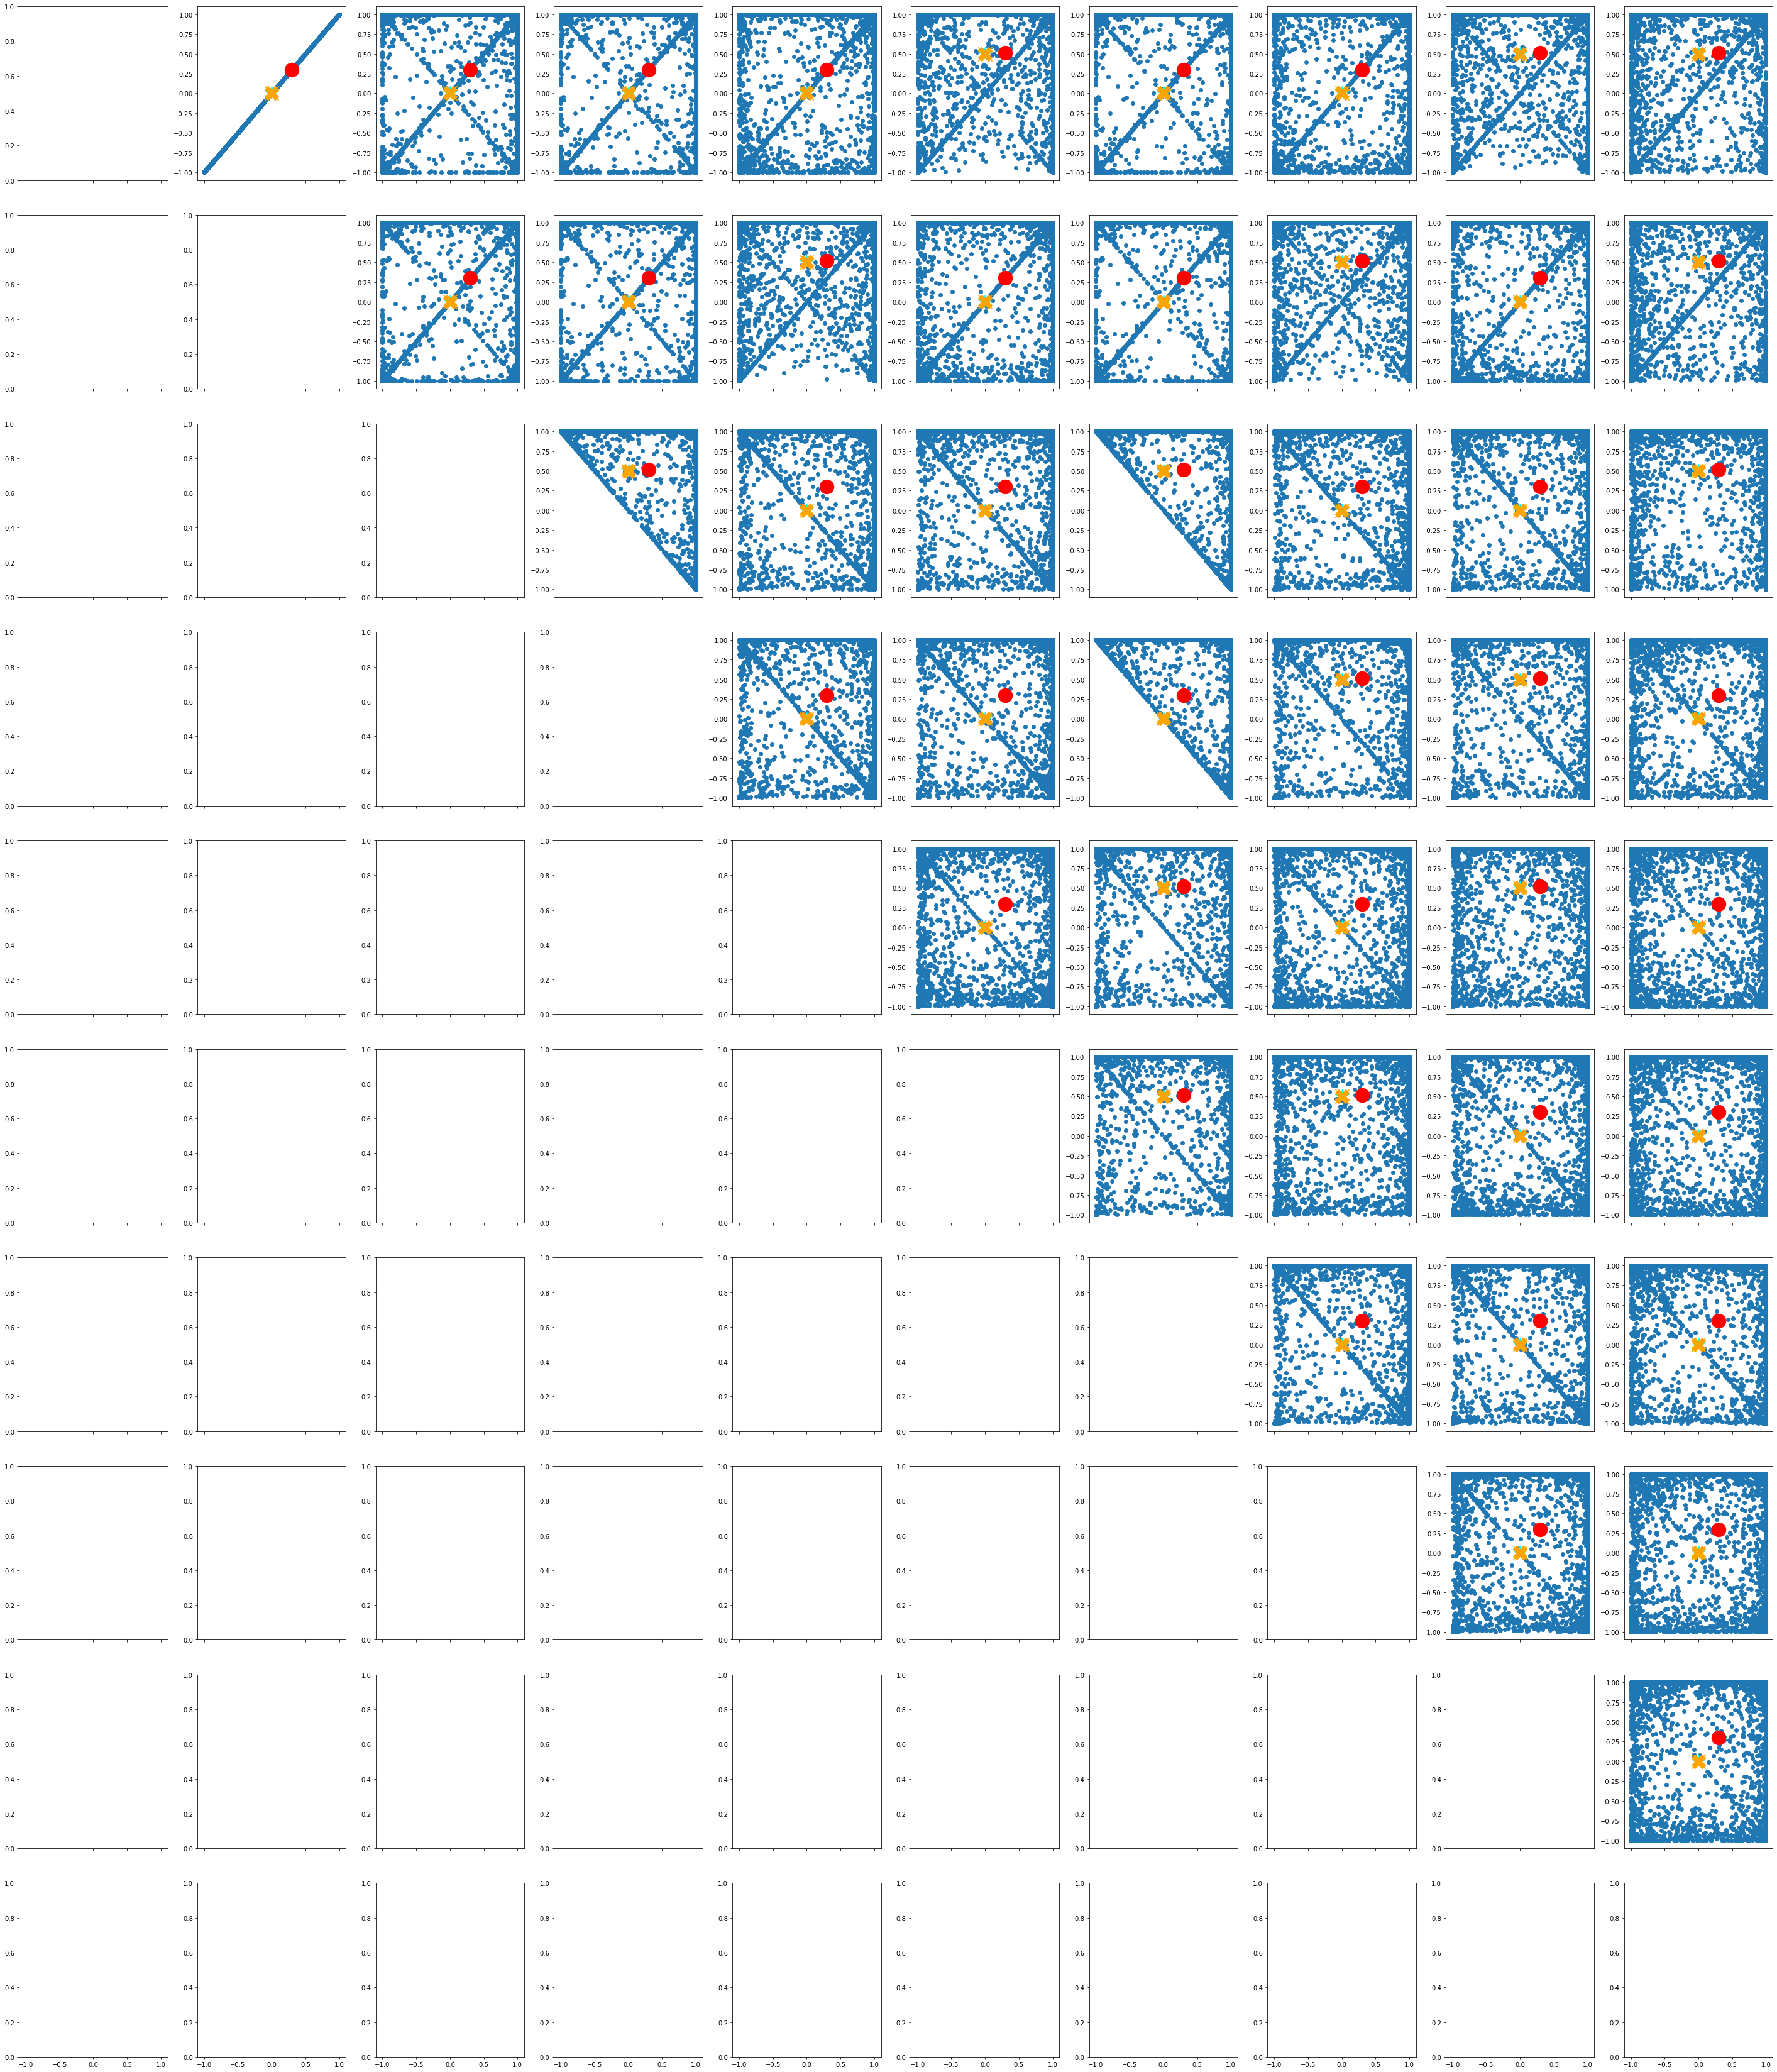

In [85]:
fig, axs = plt.subplots(n, n, figsize=(50, 60), sharex=True)

# omit the diagonal since it is constantly 1
for i in range(n):
    for j in range(i + 1, n):
        axs[i, j].scatter(V_samples[:, row, col], V_samples[:, i, j])
        axs[i, j].scatter(V_val[row, col], V_val[i, j], c="aqua", s=5e2, marker="*")
        axs[i, j].scatter(V_center[row, col], V_center[i, j], c="red", s=5e2, marker="o")
        axs[i, j].scatter(V_fixed_point[row, col], V_fixed_point[i, j], c="orange", s=5e2, marker="X")
        axs[i, j].scatter(V_path[:, row, col], V_path[:, i, j], c="orange", s=5e2, marker="x")